<h1><center style="color:white;background:blue;border-radius:0px 25px;padding:25px">Loan data</center></h1>

<ol>
    <li><a href="#readdata">Read data</a></li>
    <li><a href="#clean">data cleaning</a></li>
    <li><a href="#eda">EDA</a></li>
    <li><a href="#feaex#">Feature Extraction</a></li>
    <li><a href="#dataprep">Data Preprocessing</a></li>
    <li><a href="#model">Machine Learning Model</a></li>
    <li><a href="#tune">Hyperparameter tuning</a></li>
</ol>

## Import Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore')

<h1><center id="readdata" style="color:white;background:blue;border-radius:25px 0px;padding:25px">Read data</center></h1>

In [134]:
df = pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- There are missing values

<h1><center id="clean" style="color:white;background:blue;border-radius:25px 0px;padding:25px">Data Cleaning</center></h1>

In [136]:
len(df) == len(df['Loan_ID'].unique())

True

In [137]:
df.drop('Loan_ID', axis=1, inplace=True)

## Missing values

In [138]:
df.isna().sum() / len(df) * 100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [139]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [140]:
df['Dependents'] = df['Dependents'].apply(lambda x : int(x.split('+')[0]) if x == '3+' else x)

In [141]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Outliers

<AxesSubplot:>

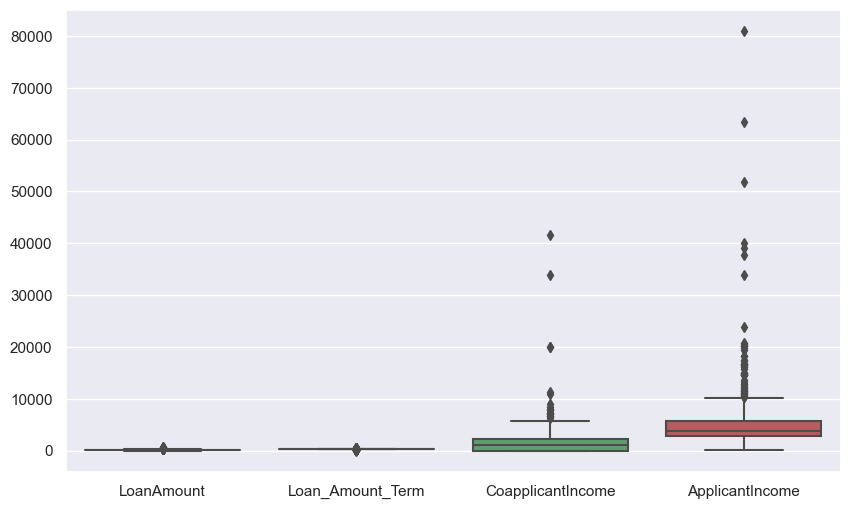

In [142]:
sns.boxplot(data=df[['LoanAmount', 'Loan_Amount_Term', 'CoapplicantIncome', 'ApplicantIncome']])

In [143]:
df[df['ApplicantIncome'] > 30000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Male,Yes,3,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,NaN,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [144]:
index = df[df['ApplicantIncome'] > 30000].index
df.drop(axis=0, index=index, inplace=True)

In [145]:
df[df['CoapplicantIncome'] > 10000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
177,Male,Yes,3,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,Female,No,3,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [146]:
index = df[df['CoapplicantIncome'] > 10000].index
df.drop(axis=0, index=index, inplace=True)

<AxesSubplot:>

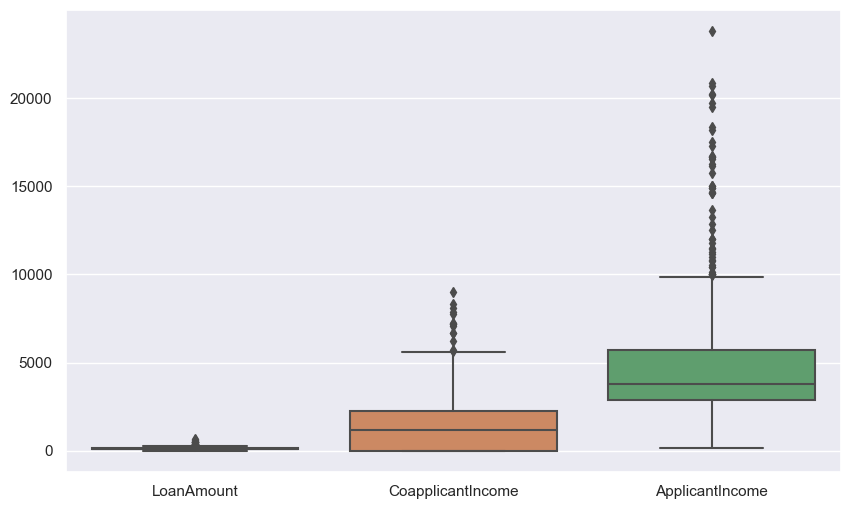

In [147]:
sns.boxplot(data=df[['LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']])

In [148]:
# reset index
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

## Check duplicate values

In [149]:
duplicated = df[df.duplicated(keep='first', subset=list(df.columns))]
len(duplicated)

0

<h1><center id="eda" style="color:white;background:blue;border-radius:25px 0px;padding:25px">EDA</center></h1>

In [150]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Univariate Analysis

In [151]:
def subplots(x,y):
    fig, axis = plt.subplots(x, y, figsize=(20,10))
    fig.tight_layout() # to fit
    return axis

In [152]:
def get_count_precent(ax):
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()-0., height, '{:1.1f}%'.format((height/len(df))*100), ha="center", fontsize=15)

In [153]:
def count_plot_with_hue(features, df, hue):
  axis = subplots(3, 3)
  index = 0
  for i in range(3):
      for j in range(3):
        if index == len(features):
          break
        ax = sns.countplot(ax=axis[i][j],x=features[index],data=df, hue=hue)
        get_count_precent(ax)
        index += 1

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


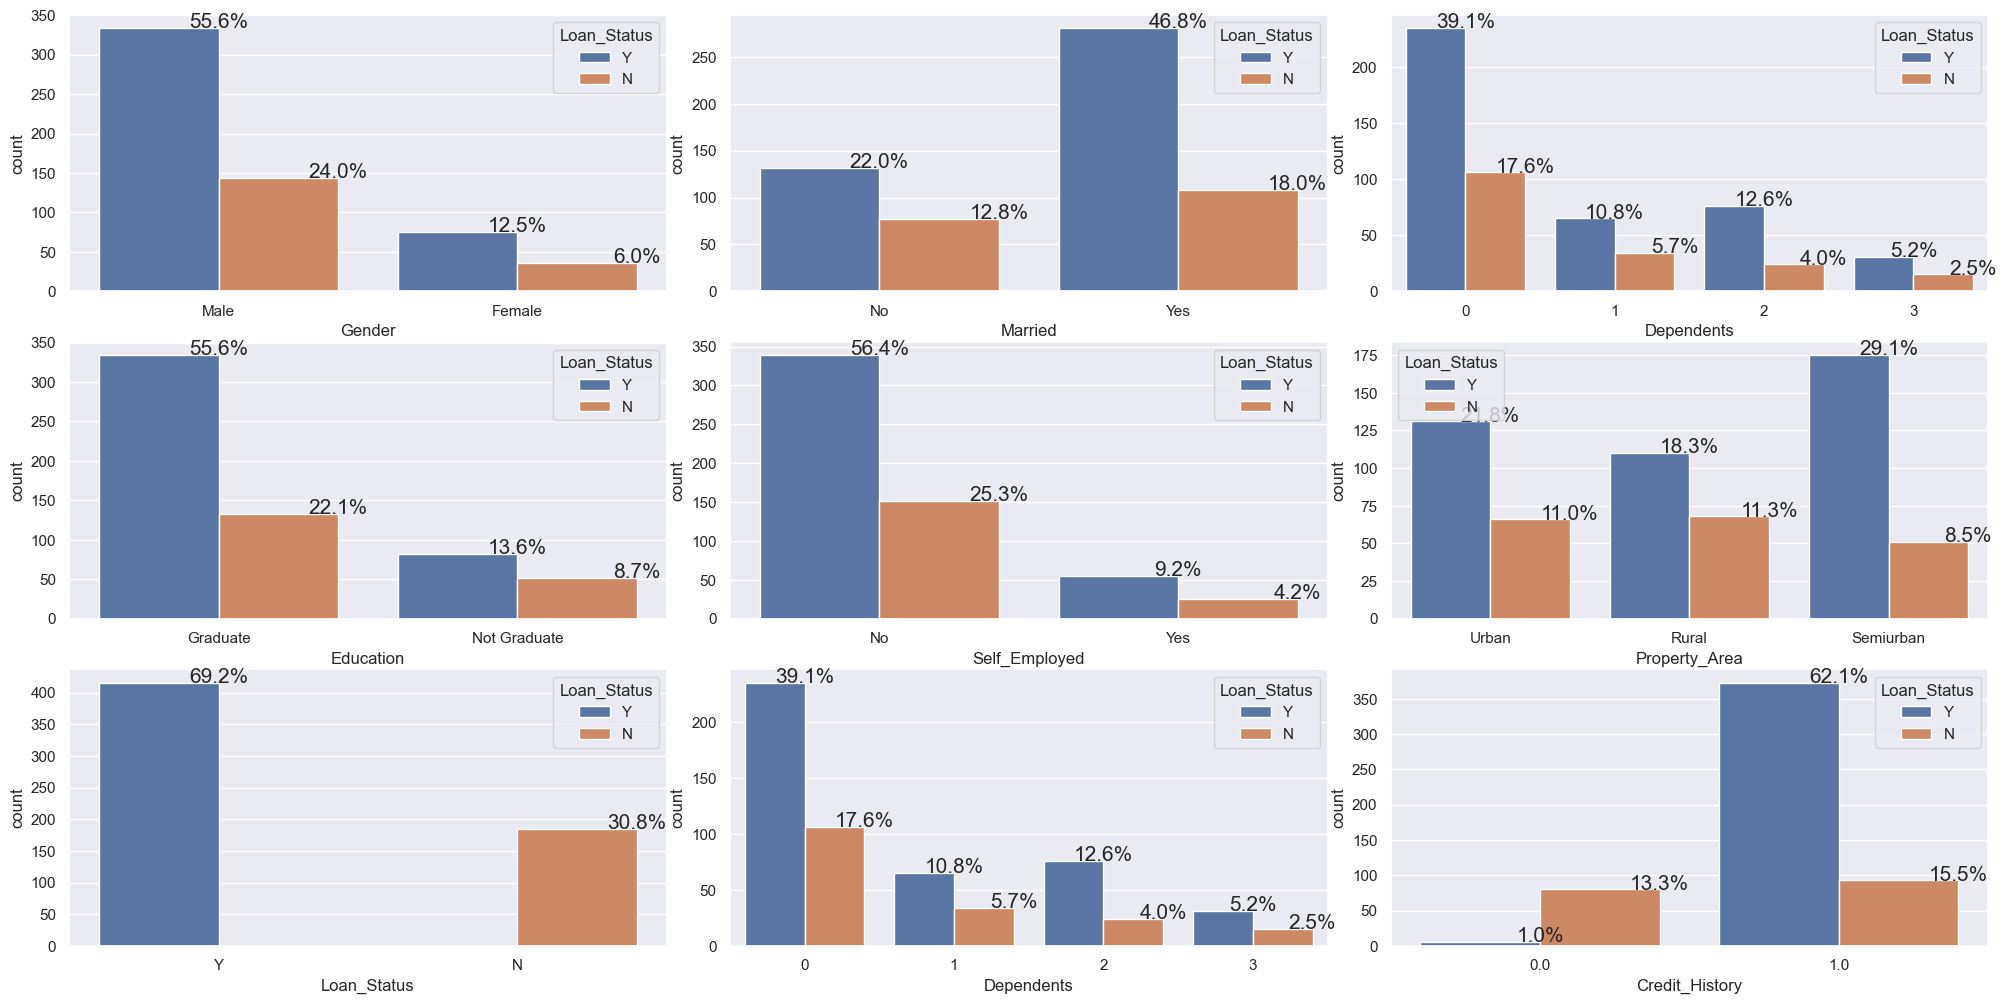

In [154]:
categorical_features = list(df.select_dtypes(include='object').columns) + ['Dependents', 'Credit_History']
count_plot_with_hue(categorical_features, df, 'Loan_Status');

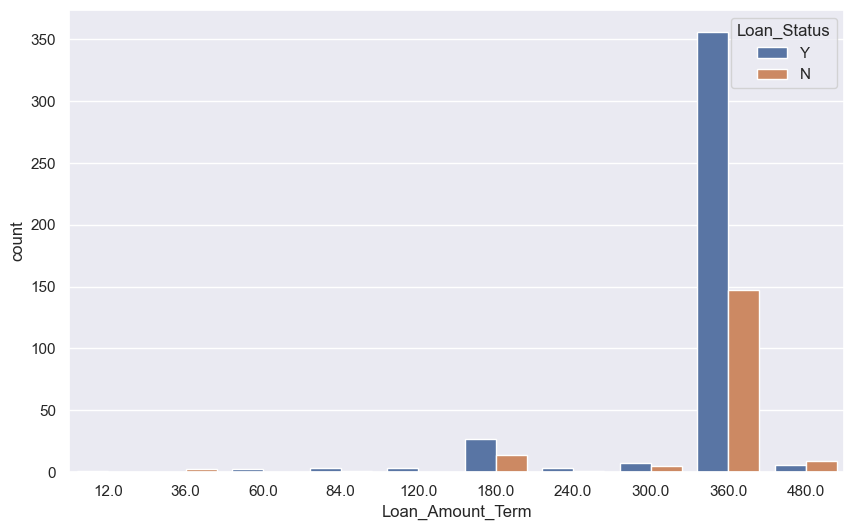

In [155]:
sns.countplot(data=df, x='Loan_Amount_Term', hue='Loan_Status');

In [156]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## multivariate Analysis

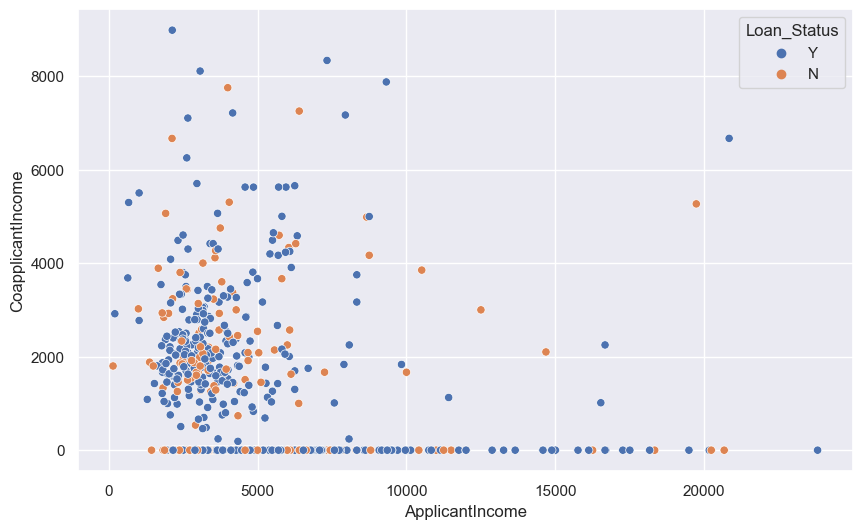

In [157]:
sns.scatterplot(data=df, x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status');

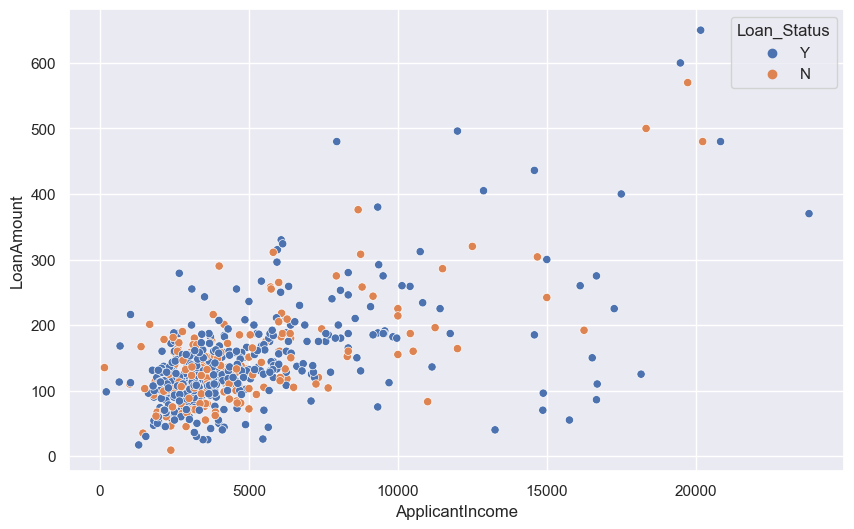

In [158]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status');

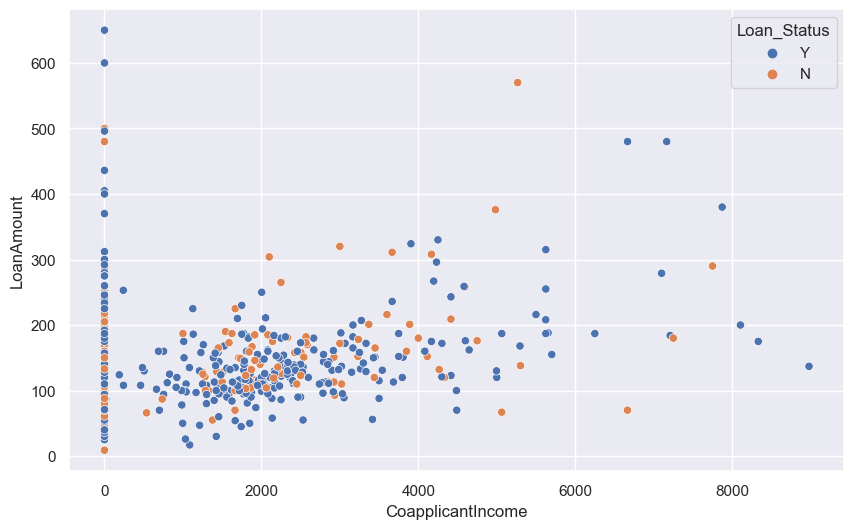

In [159]:
sns.scatterplot(data=df, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status');

<AxesSubplot:>

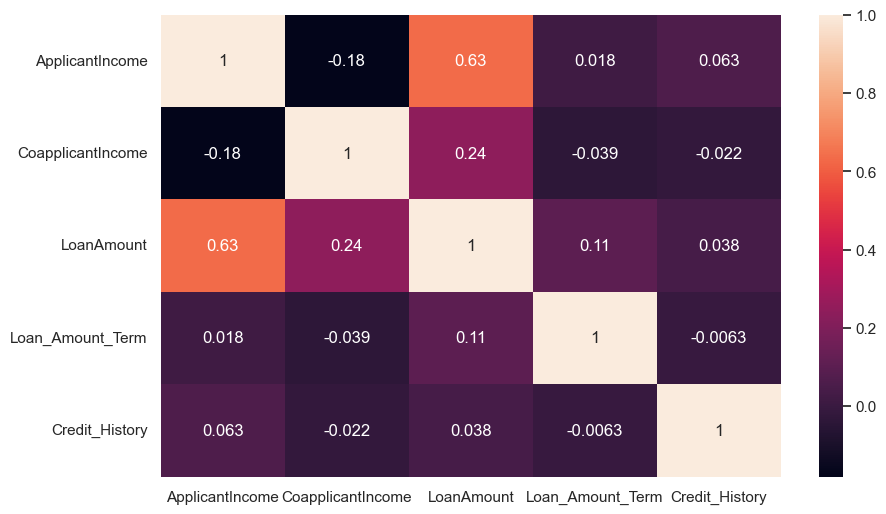

In [160]:
sns.heatmap(df.corr(), annot=True)

<h1><center id="feaex" style="color:white;background:blue;border-radius:25px 0px;padding:25px">Feature Extraction</center></h1>

In [161]:
df["total_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [162]:
df["Month_Loan_Amount"] = df["LoanAmount"] * 1000 /  df["Loan_Amount_Term"]

In [163]:
df["After_Paying_Month_Loan"] = df["total_income"] - df["Month_Loan_Amount"]

In [164]:
df["Month_Loan_Amount"] = df["Month_Loan_Amount"].apply(lambda r : round(r,2))
df["After_Paying_Month_Loan"] = df["After_Paying_Month_Loan"].apply(lambda r : round(r,2))

In [165]:
df.drop(["ApplicantIncome" , "CoapplicantIncome" ,"LoanAmount" , "Loan_Amount_Term" ] , axis = 1  , inplace = True)

<h1><center id="dataprep" style="color:white;background:blue;border-radius:25px 0px;padding:25px">Data Preprocessing</center></h1>

In [166]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income,Month_Loan_Amount,After_Paying_Month_Loan
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,1.0,Rural,N,6091.0,355.56,5735.44
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,183.33,2816.67
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4941.0,333.33,4607.67
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,391.67,5608.33


In [167]:
df['Dependents'] = df['Dependents'].astype('float')

### Log transform

In [168]:
cols = ["total_income" ,"Month_Loan_Amount" ,  "After_Paying_Month_Loan"]
for col in cols :
    df[col] = np.log(df[col])

### Convert column creadit history to be category

In [169]:
df["Credit_History"] = df["Credit_History"].astype("object")

In [170]:
df['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

<h1><center id="model" style="color:white;background:blue;border-radius:25px 0px;padding:25px">Model</center></h1>

## Split data

In [171]:
x = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [172]:
y = LabelEncoder().fit_transform(y)

## Separate numerical data and categorical data

In [173]:
Num_Cols = x.select_dtypes(include="number")
Cat_Cols = x.select_dtypes("object_")

In [174]:
# drop Dependents to handel it as a category feature
Num_Cols.drop(axis=1, columns=['Dependents'], inplace=True)

## Pipelines
- Num pipeline:-
    - KNN imputer
- Cat pipeline:-
    - simple imputer
    - One hot encoding

In [175]:
Num_pipeline_steps = list()
Num_pipeline_steps.append(("N_Imputer" , KNNImputer()))
Num_pipeline = Pipeline(steps = Num_pipeline_steps)

In [176]:
Cat_pipeline_steps = list()
Cat_pipeline_steps.append(("Cat_Imputer" , SimpleImputer(strategy="most_frequent")))
Cat_pipeline_steps.append(("Encoder" , OneHotEncoder(sparse=False , drop = "first")))
Cat_pipeline = Pipeline(steps = Cat_pipeline_steps)

## Columns transformer:-
- Num pipeline
- Cat pipeline
- simple imputer for dependents feature
- Robust Scaler

In [177]:
transform = ColumnTransformer(
    transformers=[
        ("Num",Num_pipeline,Num_Cols.columns),
        ("Cat",Cat_pipeline,Cat_Cols.columns), 
        ("d_Im",SimpleImputer(strategy="most_frequent"),["Dependents"])
        ],remainder="passthrough"
    )

## Pipeline:-
- Column transform
- Scaler
- Model

In [181]:
models = list()
models.append(("LR" , LogisticRegression()))
models.append(("SVM" , SVC()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))
models.append(("KNN", KNeighborsClassifier()))

In [182]:
for model in models:
    steps = list()
    steps.append(("transformer" , transform))
    steps.append(("scaler" , RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(estimator=pipeline, X=x, y=y, scoring="precision", cv = 10, return_train_score=True, error_score='raise')
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

LR
Train_accuracy 0.7961277680895101
----------
Test_accuracy 0.7970485701779502
--------------------


SVM
Train_accuracy 0.8056896524410868
----------
Test_accuracy 0.7965960814901674
--------------------


CART
Train_accuracy 1.0
----------
Test_accuracy 0.8000124513965176
--------------------


RF
Train_accuracy 1.0
----------
Test_accuracy 0.7980666712848905
--------------------


xg
Train_accuracy 1.0
----------
Test_accuracy 0.8134893361764959
--------------------


KNN
Train_accuracy 0.8099045185613776
----------
Test_accuracy 0.7520565887142706
--------------------




<h1><center id="tune" style="color:white;background:blue;border-radius:25px 0px;padding:25px">Hyperparameter tuning</center></h1>

In [191]:
final_steps = list()
final_steps.append(("transformer" , transform))
final_steps.append(("scaler" , RobustScaler()))
final_steps.append(("SVM" , SVC()))
pipeline = Pipeline(steps=final_steps)

In [192]:
params = [
    {'SVM__C':[0.2,0.1,0.5,1,5], 'SVM__kernel':['linear', 'sigmoid', 'poly']},
    {'SVM__C':[0.2,0.1,0.5,1,5], 'SVM__kernel':['rbf'], 'SVM__gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]},
    {'SVM__C':[0.2,0.1,0.5,1,5], 'SVM__kernel':['poly'] , "SVM__degree" :[2,3,4,5]},
    ]

In [193]:
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring='f1',
                           cv=10, n_jobs=-1,return_train_score=True)

In [194]:
grid_search.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Num',
                                                                         Pipeline(steps=[('N_Imputer',
                                                                                          KNNImputer())]),
                                                                         Index(['total_income', 'Month_Loan_Amount', 'After_Paying_Month_Loan'], dtype='object')),
                                                                        ('Cat',
                                                                         Pipeline(steps=[('Cat_Imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Encoder',
                                                                                          OneHot...
                                                                         ['Dependents'])])),
                                       ('scaler', RobustScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid=[{'SVM__C': [0.2, 0.1, 0.5, 1, 5],
                          'SVM__kernel': ['linear', 'sigmoid', 'poly']},
                         {'SVM__C': [0.2, 0.1, 0.5, 1, 5],
                          'SVM__gamma': [0.5, 0.6, 0.7, 0.1, 0.01, 0.01],
                          'SVM__kernel': ['rbf']},
                         {'SVM__C': [0.2, 0.1, 0.5, 1, 5],
                          'SVM__degree': [2, 3, 4, 5],
                          'SVM__kernel': ['poly']}],
             return_train_score=True, scoring='f1')

In [195]:
print("Best parameters", grid_search.best_params_)
print("Best Score", grid_search.best_score_)
model = grid_search.best_estimator_

Best parameters {'SVM__C': 0.2, 'SVM__kernel': 'linear'}
Best Score 0.8811262033299521


In [196]:
train_score = model.score(x, y)
print(f'Training Accuracy: {train_score}')

Training Accuracy: 0.8153078202995009


# Save $:-$
    1. Inputs
    2. Pipeline

In [197]:
# inputs
joblib.dump(x.columns, 'Inputs.h5')
# pipeline
joblib.dump(model, 'model.h5')

['model.h5']